In [75]:
import csv
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import numpy as np

In [76]:
d2020 = []
with open('deaths2020.csv', 'r') as f:
    r = csv.reader(f)
    for row in r:
        if row[0]=='Name': continue
        name = row[0]
        birth = date.fromisoformat(row[1])
        death = date.fromisoformat(row[2])
        covid = (row[3] == 'True')
        created = date.fromisoformat(row[4])
        if death < date(2020,1,1):
            print ("Oops {} death {}".format(name, death))
            continue
        d2020.append([name,birth,death,covid,created])

Oops Lawrence Bittaker and Roy Norris death 2019-12-13
Oops Jack Burns death 2019-12-01
Oops Stanislav Libenský and Jaroslava Brychtová death 2002-02-24


In [77]:
dd2020 = [row for row in d2020 if row[4] < date(2019,1,1)]

In [78]:
dates = [date(2020,1,1)+timedelta(days=j) for j in range((date(2020,4,20)-date(2020,1,1)).days)]

In [79]:
count_all = [0]*len(dates)
count_cvd = [0]*len(dates)
count_base = [0]*len(dates)

In [80]:
for row in dd2020:
    j=(row[2]-date(2020,1,1)).days
    count_all[j] += 1
    if row[3]:
        count_cvd[j] += 1
    else:
        count_base[j] += 1

In [91]:
def ma(x, win=7):
    w = np.ones(win)/win
    return np.convolve(x, w, 'valid')
ma_all = ma(count_all)
ma_cvd = ma(count_cvd)
ma_base = ma(count_base)

In [115]:
d2019 = []
with open('deaths2019.csv', 'r') as f:
    r = csv.reader(f)
    for row in r:
        if row[0]=='Name': continue
        name = row[0]
        birth = date.fromisoformat(row[1])
        death = date.fromisoformat(row[2])
        covid = (row[3] == 'True')
        created = date.fromisoformat(row[4])
        if death < date(2019,1,1) or death>=date(2020,1,1):
            print ("Oops {} death {}".format(name, death))
            continue
        d2019.append([name,birth,death,covid,created])
dd2019 = [row for row in d2019 if row[4] < date(2019,1,1)]

Oops Ahmad Shah of Pahang death 1932-06-23
Oops Dixie Allen death 2006-07-27
Oops Claire Ball death 1982-12-31
Oops Bettina F. Bradbury death 2006-01-20
Oops Russ Cochran (publisher) death 2020-02-23
Oops Hein & Oss death 2016-02-14
Oops Susan Irvine death 2013-08-05
Oops Sushil Kumar (admiral) death 2001-12-29
Oops Ehsan-ul-Haq Piracha death 1990-12-06
Oops Keith Robbins death 2001-08-31
Oops Augie and Margo Rodriguez death 2014-07-18
Oops Hogan Sheffer death 2006-08-09
Oops Peter Smedley death 2011-04-11
Oops Sam Szafran death 2011-01-30
Oops Brian Tarantina death 1980-03-30
Oops Marv Terhoch death 1981-05-31
Oops Ed and Lorraine Warren death 2006-08-23


In [116]:
count2019 = [0]*365
for row in dd2019:
    j=(row[2]-date(2019,1,1)).days
    count2019[j]+=1
ma2019 = ma(count2019)

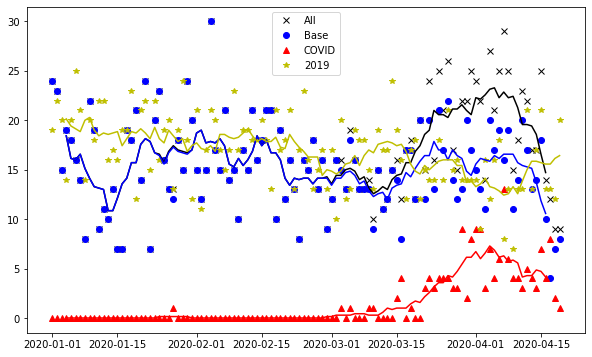

In [117]:
plt.figure(figsize=(10,6))
plt.plot_date(dates, count_all, 'kx')
plt.plot_date(dates, count_base, 'bo')
plt.plot_date(dates, count_cvd, 'r^')
plt.plot_date(dates, count2019[:len(dates)], 'y*')
plt.plot_date(dates[3:-3], ma_all, 'k-')
plt.plot_date(dates[3:-3], ma_base, 'b-')
plt.plot_date(dates[3:-3], ma_cvd, 'r-')
plt.plot_date(dates[3:], ma2019[:len(dates)-3], 'y-')
plt.legend(['All', 'Base', 'COVID', '2019'])

In [113]:
ages = [(row[2] - row[1])/timedelta(days=365.25) for row in dd2020]
ages_cvd = [(row[2] - row[1])/timedelta(days=365.25) for row in dd2020 if row[3]]

(array([ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,  3.,  7.,  9.,
        11., 20., 24., 30., 27., 16.,  7.,  1.,  1.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110.]),
 <a list of 22 Patch objects>)

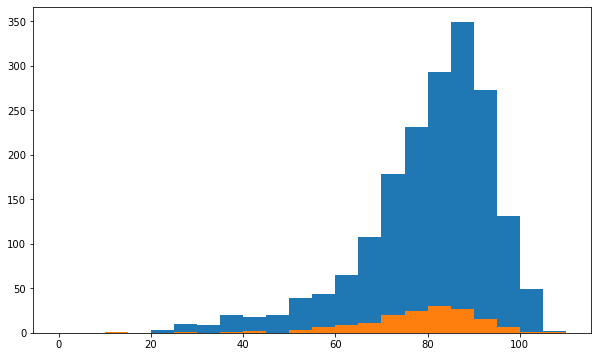

In [114]:
plt.figure(figsize=(10,6))
plt.hist(ages, bins=22, range=(0,110))
plt.hist(ages_cvd, bins=22, range=(0,110))